In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
import time

#Data
strdata=np.loadtxt('energy.csv', delimiter=',', dtype=str)
strdata=strdata[1:,:]
data=strdata.astype('double')
input=data[:,0:-2]
output1=data[:,-2:-1]
output1[output1<=22.3] = -1 #small heating load
output1[output1> 22.3] = 1 #large heating load

output2=data[:,-1:-1]
output2[output2<=24.6] = -1 #small cooling load
output2[output2> 24.6] = 1 #large cooling load

input.shape
ones=np.ones((768,1))
ones.astype(float)
input=np.append(ones, input, axis=1)
#splitting test and train
X_train, X_test, y_train, y_test = train_test_split (input, output1)


In [6]:
#initialize weights and learning
weights=np.ones((input.shape[1]))/ 100 #input.shape[1] 
learningr=0.001
i=0
while i < 10:
    i+=1

    #calculate a
    acalc=np.sum(X_train*weights, axis=1)    
    #print(acalc)

    #calculate y minus a
    y_train=y_train.ravel()
    ydiff=y_train-acalc
    #print(y_train)
    #print(ydiff)

    #Calculate error
    aerror=np.copy(acalc)
    aerror[aerror<=0.5]=0
    aerror[aerror>0.5]=1
    difference=abs(aerror-y_train)
    error=np.sum(difference)/difference.size


    #one iteration of gradient
    gradient=[]
    for j in range(X_train.shape[1]):
        val=sum(X_train[:,j]*ydiff)*learningr
        gradient.append(val)
    #print(gradient)

    #update weights
    weights+=gradient


In [7]:
#test data
answera=np.sum(X_test*weights, axis=1)
answera[answera<=0.5]=0
answera[answera>0.5]=1
y_test=y_test.ravel()
difference=abs(answera-y_test)
error=np.sum(difference)/difference.size


[ 0.9982589   0.9988857  -0.36501914  0.40280413  0.61608837  0.99390616
  0.99651781  0.99982589  0.99129452]


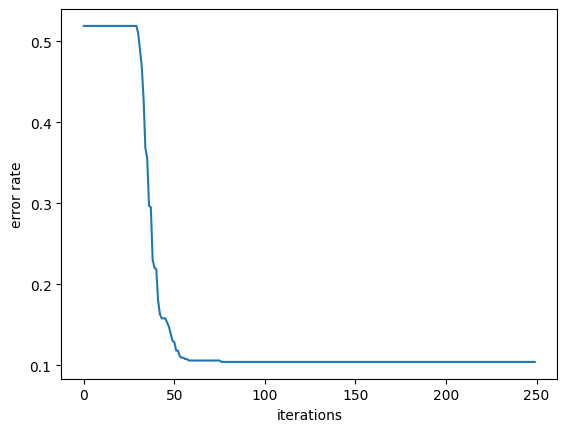

In [27]:
#########Starts here- Problem 1
import numpy as np
from sklearn.model_selection import train_test_split
import timeit

#Data
strdata=np.loadtxt('energy.csv', delimiter=',', dtype=str)
strdata=strdata[1:,:]
data=strdata.astype('double')
input=data[:,:-2]
output1=data[:,-2:-1]
output1[output1<=22.3] = 0 #small heating load
output1[output1> 22.3] = 1 #large heating load

ones=np.ones((768,1))
ones.astype(float)
input=np.append(ones, input, axis=1)
#splitting test and train
vals=[0.1, 0.25, 0.35, 0.50, 0.65, 0.75, 0.9]
#vals=[0.25]
iterations=[]
timetotrain1=[]
errortest1=[]
errortrain1=[]
erroriter1=[]
weightsval1=[]
for val in vals:
    X_train, X_test, y_train, y_test = train_test_split (input, output1, test_size=val, random_state=212)
    weights=np.ones((input.shape[1]))#/ (input.shape[1]*1000)
    learningr=0.0000002
    iter=0
    start=time.time()

    while iter<250:
        #print(X_train)
        #print(y_train)
        #print(weights)
        iter+=1

        #calculate a
        acalc=np.sum(X_train*weights, axis=1)   
        #print(acalc)

        #calculate y minus a
        y_train=y_train.ravel()
        ydiff=y_train-acalc
        #print(ydiff)
        #print(y_train)
        #print(ydiff)

        #Calculate error
        aerror=np.copy(acalc)
        aerror[aerror<=0.5]=0
        aerror[aerror>0.5]=1
        #print(aerror)
        #print(aerror)
        difference=abs(aerror-y_train)
        #print(difference)
        error=np.sum(difference)/y_train.size
        if val== 0.25:
            erroriter1.append(error)
            weightsval1.append(weights)


        #one iteration of gradient
        gradient=[]
        #print(X_train.shape[1]) #number of factors
        for j in range(X_train.shape[1]):
            valv=0
            for k in range(X_train.shape[0]):
                valv=X_train[k,j]*ydiff[k]
                #print(val) #sum up all of the values for each row
            valv=valv*learningr
            gradient.append(valv)
        weights+=gradient


    stop=time.time()
    timer=stop-start
    iterations.append(iter)
    timetotrain1.append(timer)
    errortrain1.append(error)

    
    #test data
    answera=np.sum(X_test*weights, axis=1)
    answera[answera<=0.5]=0
    answera[answera>0.5]=1

    y_test=y_test.ravel()
    difference=abs(answera-y_test)
    error=np.sum(difference)/difference.size
    errortest1.append(error)

import matplotlib.pyplot as plt
plt.plot(erroriter1)
#plt.legend("classificaiton Question 1")
plt.xlabel("iterations")
plt.ylabel("error rate")
print(weights)

Text(0, 0.5, 'error rate')

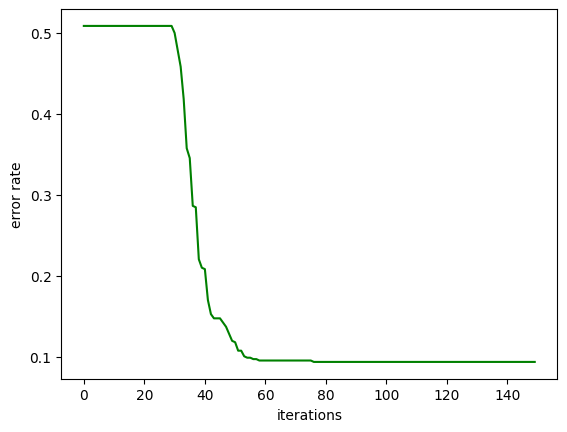

In [21]:
#########Starts here- Problem 2
import numpy as np
from sklearn.model_selection import train_test_split
import timeit

#Data
strdata=np.loadtxt('energy.csv', delimiter=',', dtype=str)
strdata=strdata[1:,:]
data=strdata.astype('double')
input=data[:,:-2]
output2=data[:,-1:]
output2[output2<=24.6] = 0 #small cooling load
output2[output2> 24.6] = 1 #large cooling load

ones=np.ones((768,1))
ones.astype(float)
input=np.append(ones, input, axis=1)
#splitting test and train
vals=[0.1, 0.25, 0.35, 0.50, 0.65, 0.75, 0.9]
#vals=[0.25]
iterations=[]
timetotrain2=[]
errortest2=[]
errortrain2=[]
erroriter2=[]
weightsval21=[]
weightsval22=[]
weightsval23=[]
weightsval24=[]
weightsval25=[]
weightsval26=[]
weightsval27=[]
weightsval28=[]
weightsval29=[]
for val in vals:
    X_train, X_test, y_train, y_test = train_test_split (input, output2, test_size=val, random_state=212)
    weights=np.ones((input.shape[1]))#/ (input.shape[1]*1000)
    learningr=0.0000002
    iter=0
    start=time.time()

    while iter < 150:
        #print(X_train)
        #print(y_train)
        #print(weights)
        iter+=1

        #calculate a
        acalc=np.sum(X_train*weights, axis=1)   
        #print(acalc)

        #calculate y minus a
        y_train=y_train.ravel()
        ydiff=y_train-acalc
        #print(ydiff)
        #print(y_train)
        #print(ydiff)

        #Calculate error
        aerror=np.copy(acalc)
        aerror[aerror<=0.5]=0
        aerror[aerror>0.5]=1
        #print(aerror)
        #print(aerror)
        difference=abs(aerror-y_train)
        #print(difference)
        error=np.sum(difference)/y_train.size
        if val== 0.25:
            erroriter2.append(error)
            weightsval21.append(weights[0])
            weightsval22.append(weights[1])
            weightsval23.append(weights[2])
            weightsval24.append(weights[3])
            weightsval25.append(weights[4])
            weightsval26.append(weights[5])
            weightsval27.append(weights[6])
            weightsval28.append(weights[7])
            weightsval29.append(weights[8])
            weightssave2=weights



        #one iteration of gradient
        gradient=[]
        #print(X_train.shape[1]) #number of factors
        for j in range(X_train.shape[1]):
            valv=0
            for k in range(X_train.shape[0]):
                valv=X_train[k,j]*ydiff[k]
                #print(val) #sum up all of the values for each row
            valv=valv*learningr
            gradient.append(valv)
        weights+=gradient


    stop=time.time()
    timer=stop-start
    iterations.append(iter)
    timetotrain2.append(timer)
    errortrain2.append(error)
    
    #test data
    answera=np.sum(X_test*weights, axis=1)
    answera[answera<=0.5]=0
    answera[answera>0.5]=1

    y_test=y_test.ravel()
    difference=abs(answera-y_test)
    error=np.sum(difference)/difference.size
    errortest2.append(error)

import matplotlib.pyplot as plt


plt.plot(erroriter2, 'g')
#plt.legend('Classificaiton Question 2')
plt.xlabel("iterations")
plt.ylabel("error rate")

In [28]:
weightssave2


array([ 0.9982589 ,  0.9988857 , -0.36501914,  0.40280413,  0.61608837,
        0.99390616,  0.99651781,  0.99982589,  0.99129452])

[ 0.9982589   0.9988857  -0.36501914  0.40280413  0.61608837  0.99390616
  0.99651781  0.99982589  0.99129452]


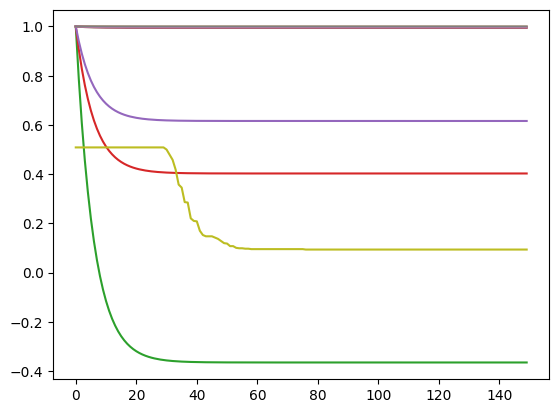

In [22]:
#print(iterations)
#print(timetotrain1)
#print(errortrain1)
#print(errortest1)
#print(erroriter1)
plt.plot(weightsval21)
plt.plot(weightsval22)
plt.plot(weightsval23)
plt.plot(weightsval24)
plt.plot(weightsval25)
plt.plot(weightsval26)
plt.plot(weightsval27)
plt.plot(weightsval28)
plt.plot(erroriter2)
print(weightssave2)

Text(0, 0.5, 'Error Rate')

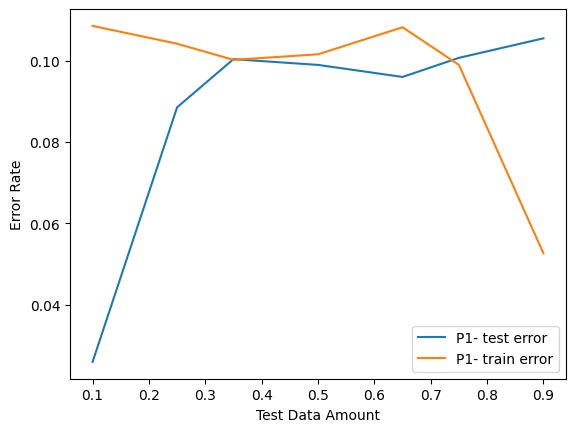

In [24]:
plt.plot(vals, errortest1, vals, errortrain1)
plt.legend(["P1- test error", "P1- train error"])
plt.xlabel("Test Data Amount")
plt.ylabel("Error Rate")

Text(0, 0.5, 'Error Rate')

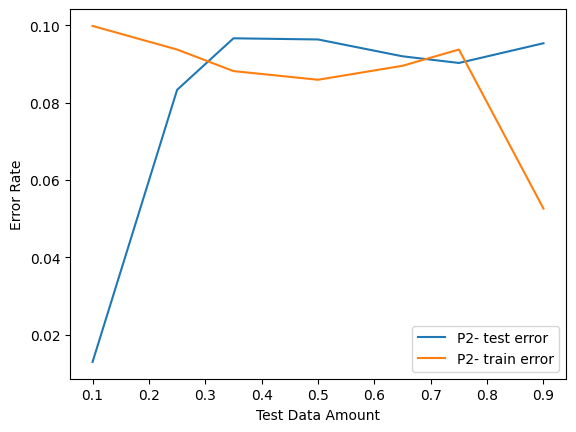

In [25]:
plt.plot(vals, errortest2, vals, errortrain2)
plt.legend(["P2- test error", "P2- train error"])
plt.xlabel("Test Data Amount")
plt.ylabel("Error Rate")

Text(0, 0.5, 'Time')

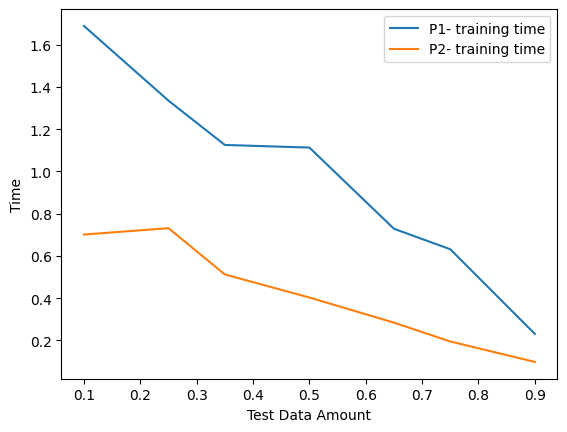

In [26]:
plt.plot(vals, timetotrain1, vals, timetotrain2)
plt.legend(["P1- training time", "P2- training time"])# test error", "P2- train error"])
plt.xlabel("Test Data Amount")
plt.ylabel("Time")